## Импорт данных

In [1]:
import json

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [108]:
np.random.seed(1345343653)

In [3]:
friends = pd.read_csv('data/friends.csv')
friends

,user1,user2
0,1119,9216
1,1119,3580931
2,1119,6055941
3,1119,425991
4,1119,1032
...,...,...
953174,826753971,817348339
953175,826753971,481433973
953176,826753971,761845624
953177,826753971,418635257


In [4]:
links_test = pd.read_csv('data/links_test.csv', index_col="ID")
links_test

,user1,user2
ID,,
0,426512423,767230291
1,127744839,589283004
2,76324543,189101836
3,79828756,272293999
4,88063046,280460807
...,...,...
706402,266088,172683390
706403,158366680,181474112
706404,50956059,82110465


In [5]:
links_train = pd.read_csv('data/links_train.csv')
links_train

,user1,user2,is_friends
0,82530889,157814259,0
1,104274145,669799766,0
2,227438304,268462283,0
3,782512,66408174,0
4,164821380,188883374,0
...,...,...,...
6356749,151713163,349490510,0
6356750,111420790,214609156,0
6356751,29149621,293027231,0
6356752,18239,251384889,0


In [6]:
posts = pd.read_csv('data/posts.csv')
posts

,comments_count,attachments_count,views,likes,author_id,post_type,post_dttm
0,1,0,NaN,0.0,1119,post,1685912400
1,2,0,1402.0,24.0,1119,post,1664053200
2,3,0,852.0,8.0,1119,post,1647205200
3,7,1,1390.0,24.0,1119,post,1630702800
4,7,2,1819.0,14.0,1119,post,1612299600
...,...,...,...,...,...,...,...
43974,0,0,93.0,5.0,767659568,post,1683579600
43975,4,0,110.0,5.0,767659568,post,1683493200
43976,0,1,31.0,10.0,786894578,post,1677445200
43977,0,0,9.0,0.0,819284841,post,1693429200


In [7]:
profiles = pd.read_csv('data/profiles.csv', index_col="id")
profiles

,is_closed,city,sex,followers_count,schools,schools_years_grad,universities,universities_years_grad,faculties,careers
id,,,,,,,,,,
1119,False,2.0,2,1256.0,NaN,NaN,NaN,NaN,NaN,NaN
1127,False,2.0,2,2738.0,"['12', '3447', '59']","[2005, None, None]","[53, 53, 53]","[2011, 2014, 2012]","[201, 201, 169574]","[None, None, None, None, None, None, None]"
2619,True,2.0,2,NaN,"['54', '1319']","[2005, None]","[1, 29, 1]","[2010, 2011, 2013]","[7, 1815, 7]",[]
2767,False,2.0,2,446.0,"['12', '6972', '969864']","[2005, 2001, 1996]",[53],[2011],[201],[]
4023,False,2.0,2,462.0,"['54054', '11301']","[2002, 2002]","[53, 53]","[2008, 2011]","[202, 208]","[94, 94, None]"
...,...,...,...,...,...,...,...,...,...,...
812158979,False,2.0,1,24.0,"['346', '279']","[None, None]",[53],[None],[None],[]
819284841,False,NaN,2,3.0,[],[],[],[],[],[]
821178234,False,NaN,2,1.0,[],[],[],[],[],[]


In [8]:
target = links_train[["is_friends"]]
target

,is_friends
0,0
1,0
2,0
3,0
4,0
...,...
6356749,0
6356750,0
6356751,0
6356752,0


In [9]:
profiles_1 = profiles.add_prefix("user1_")
profiles_2 = profiles.add_prefix("user2_")
train_profiles = pd.merge(links_train, profiles_1, "left", left_on="user1", right_index=True)
train_profiles = pd.merge(train_profiles, profiles_2, "left", left_on="user2", right_index=True)
train_profiles

,user1,user2,is_friends,user1_is_closed,user1_city,user1_sex,user1_followers_count,user1_schools,user1_schools_years_grad,user1_universities,...,user2_is_closed,user2_city,user2_sex,user2_followers_count,user2_schools,user2_schools_years_grad,user2_universities,user2_universities_years_grad,user2_faculties,user2_careers
0,82530889,157814259,0,False,NaN,2,313.0,NaN,NaN,NaN,...,False,2.0,2,371.0,"['1428', '7307']","[None, 2020]",[17],[None],[78],[]
1,104274145,669799766,0,False,NaN,2,706.0,[],[],"[53, 27, 53]",...,False,NaN,1,201.0,[],[],[],[],[],[]
2,227438304,268462283,0,False,2.0,1,156.0,[],[],[53],...,False,NaN,2,207.0,[],[],[53],[None],[None],[]
3,782512,66408174,0,False,2.0,2,213.0,"['52067', '248414']","[2000, 2000]","[53, 53]",...,False,2.0,2,252.0,NaN,NaN,NaN,NaN,NaN,NaN
4,164821380,188883374,0,False,NaN,2,81.0,['251150'],[None],[853],...,False,2.0,2,329.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356749,151713163,349490510,0,False,NaN,1,702.0,NaN,NaN,NaN,...,False,49.0,2,184.0,"['141028', '200745']","[None, None]",[53],[None],[None],[]
6356750,111420790,214609156,0,False,2.0,2,73.0,NaN,NaN,NaN,...,False,NaN,2,557.0,[],[],[],[],[],[]
6356751,29149621,293027231,0,False,NaN,2,372.0,NaN,NaN,NaN,...,False,2.0,2,140.0,[],[],[65],[None],[None],[]
6356752,18239,251384889,0,False,2.0,2,1887.0,['1739'],[None],[53],...,False,2.0,2,189.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset = train_profiles

## Трансформация

In [11]:
dataset.dtypes

user1                              int64
user2                              int64
is_friends                         int64
user1_is_closed                     bool
user1_city                       float64
user1_sex                          int64
user1_followers_count            float64
user1_schools                     object
user1_schools_years_grad          object
user1_universities                object
user1_universities_years_grad     object
user1_faculties                   object
user1_careers                     object
user2_is_closed                     bool
user2_city                       float64
user2_sex                          int64
user2_followers_count            float64
user2_schools                     object
user2_schools_years_grad          object
user2_universities                object
user2_universities_years_grad     object
user2_faculties                   object
user2_careers                     object
dtype: object

In [12]:
def parse_str_array(x: str):
    y = json.loads(x.replace("\'", "\"").replace("None", "\"NaN\""))
    return y
    
def take_first_from_str_array(x: str):
    y = parse_str_array(x)
    return int(y[0]) if len(y) > 0 else -1

def take_first(col: pd.Series):
    return col.map(take_first_from_str_array, na_action='ignore').fillna(-1).astype(int)

def check_str_array_intersection(label1, label2):
    def func(row):
        col1 = row[label1]
        col2 = row[label2]
        if (col1 is None or col2 is None or 
                isinstance(col1, float) or isinstance(col2, float)):
            return False
        x = set(parse_str_array(row[label1]))
        x.discard('NaN')
        y = set(parse_str_array(row[label2]))
        y.discard('NaN')
        return len(x.intersection(y)) > 0
    return func

def get_friends_set(node: int):
    return set(friends.loc[friends.user1 == node]['user2']).union(set(friends.loc[friends.user2 == node]['user1']))

def count_common_friends(row):
    return len(get_friends_set(row.user1).intersection(get_friends_set(row.user2)))

In [13]:
# dataset['same_city'] = dataset.user1_city == dataset.user2_city
# dataset['same_sex'] = dataset.user1_sex == dataset.user2_sex
# dataset['same_school'] = dataset.apply(check_str_array_intersection("user1_schools", "user2_schools"), axis=1)
# dataset['same_university'] = dataset.apply(check_str_array_intersection("user1_universities", "user2_universities"), axis=1)
# dataset['same_faculty'] = dataset.apply(check_str_array_intersection("user1_faculties", "user2_faculties"), axis=1)
# dataset['same_career'] = dataset.apply(check_str_array_intersection("user1_careers", "user2_careers"), axis=1)
# dataset['same_university_and_faculty'] = dataset.same_university & dataset.same_faculty
# dataset['common_friends_count'] = dataset.apply(count_common_friends, axis=1)
dataset = pd.read_csv('checkpoints/dataset.csv')

In [14]:
dataset

,Unnamed: 0,user1,user2,is_friends,user1_is_closed,user1_city,user1_sex,user1_followers_count,user1_schools,user1_schools_years_grad,...,user2_faculties,user2_careers,same_city,same_sex,same_school,same_university,same_faculty,same_career,same_university_and_faculty,common_friends_count
0,0,82530889,157814259,0,False,NaN,2,313.0,NaN,NaN,...,[78],[],False,True,False,False,False,False,False,0
1,1,104274145,669799766,0,False,NaN,2,706.0,[],[],...,[],[],False,False,False,False,False,False,False,0
2,2,227438304,268462283,0,False,2.0,1,156.0,[],[],...,[None],[],False,False,False,True,False,False,False,0
3,3,782512,66408174,0,False,2.0,2,213.0,"['52067', '248414']","[2000, 2000]",...,NaN,NaN,True,True,False,False,False,False,False,0
4,4,164821380,188883374,0,False,NaN,2,81.0,['251150'],[None],...,NaN,NaN,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356749,6356749,151713163,349490510,0,False,NaN,1,702.0,NaN,NaN,...,[None],[],False,False,False,False,False,False,False,0
6356750,6356750,111420790,214609156,0,False,2.0,2,73.0,NaN,NaN,...,[],[],False,True,False,False,False,False,False,0
6356751,6356751,29149621,293027231,0,False,NaN,2,372.0,NaN,NaN,...,[None],[],False,True,False,False,False,False,False,0
6356752,6356752,18239,251384889,0,False,2.0,2,1887.0,['1739'],[None],...,NaN,NaN,True,True,False,False,False,False,False,4


In [15]:
dataset.dtypes

Unnamed: 0                         int64
user1                              int64
user2                              int64
is_friends                         int64
user1_is_closed                     bool
user1_city                       float64
user1_sex                          int64
user1_followers_count            float64
user1_schools                     object
user1_schools_years_grad          object
user1_universities                object
user1_universities_years_grad     object
user1_faculties                   object
user1_careers                     object
user2_is_closed                     bool
user2_city                       float64
user2_sex                          int64
user2_followers_count            float64
user2_schools                     object
user2_schools_years_grad          object
user2_universities                object
user2_universities_years_grad     object
user2_faculties                   object
user2_careers                     object
same_city       

In [16]:
dataset.to_csv('checkpoints/dataset.csv')

In [17]:
dataset_cut = dataset[["common_friends_count", 'same_career', 'same_city', 'same_university_and_faculty', 'same_faculty', "is_friends"]]
dataset_cut.dropna(inplace=True)

dataset_cut_cut = dataset_cut.loc[dataset_cut.common_friends_count <= 1]

dataset_cut

C:\Users\btima\AppData\Local\Temp\ipykernel_3848\3324630639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cut.dropna(inplace=True)


,common_friends_count,same_career,same_city,same_university_and_faculty,same_faculty,is_friends
0,0,False,False,False,False,0
1,0,False,False,False,False,0
2,0,False,False,False,False,0
3,0,False,True,False,False,0
4,0,False,False,False,False,0
...,...,...,...,...,...,...
6356749,0,False,False,False,False,0
6356750,0,False,False,False,False,0
6356751,0,False,False,False,False,0
6356752,4,False,True,False,False,0


In [18]:
features = dataset_cut.drop(["is_friends"], axis=1)
features_cut = dataset_cut_cut.drop(["is_friends"], axis=1)
target = dataset_cut[["is_friends"]]
target_cut = dataset_cut_cut[["is_friends"]]

In [19]:
features

,common_friends_count,same_career,same_city,same_university_and_faculty,same_faculty
0,0,False,False,False,False
1,0,False,False,False,False
2,0,False,False,False,False
3,0,False,True,False,False
4,0,False,False,False,False
...,...,...,...,...,...
6356749,0,False,False,False,False
6356750,0,False,False,False,False
6356751,0,False,False,False,False
6356752,4,False,True,False,False


In [20]:
target

,is_friends
0,0
1,0
2,0
3,0
4,0
...,...
6356749,0
6356750,0
6356751,0
6356752,0


## Магия?

In [21]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.25, random_state=1345343653)

In [49]:
class MagicModel:
    def __init__(self, k, prob = 0):
        self.size = None
        self.k = k
        self.prob = prob
    def fit(self, x, y):
        self.size = len(x)
        return self
    def predict(self, x):
        self.inter = np.full(x['common_friends_count'].shape, False)
        if self.size is not None:
            prob = self.prob / self.size
            self.inter = np.random.choice([False, True], len(self.inter), p=[1 - prob, prob])
        return (x['common_friends_count'] > self.k) | self.inter

class MagicEnsemble:
    def __init__(self, *models):
        self.models = models
    
    def predict(self, x):
        y = self.models[0].predict(x)
        for i in self.models[1:]:
            y = y | i.predict(x)
        return y

![Decision Trees](img.png)

In [23]:
def plot_roc_auc(x_values, models, param_label="Parameter"):
    assert len(models) == len(x_values)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    pred_train = []
    pred_test = []
    for pos, model in enumerate(models):
        pred_train.append(roc_auc_score(train_target, model.predict(train_features)))
        pred_test.append(roc_auc_score(test_target, model.predict(test_features)))
    ax1.plot(x_values, pred_train, marker=".")
    ax2.plot(x_values, pred_test, marker=".")
    print(pred_test)
    for i in [ax1, ax2]:
        i.grid()    
        i.ticklabel_format(useOffset=False, style='plain')
        i.set_xlabel(param_label, fontsize=20)
    ax1.set_ylabel("ROC AUC (train)", fontsize=20)
    ax2.set_ylabel("ROC AUC (test)", fontsize=20)
    fig.tight_layout()

100%|██████████| 10/10 [00:00<?, ?it/s]


[0.928872082107152, 0.9469076693773741, 0.9408408890639796, 0.9254268597678222, 0.9106047475170383, 0.8937399200185702, 0.8745112868350747, 0.8564051637506055, 0.8392747433596182, 0.8223009136895201]


100%|██████████| 30/30 [00:30<00:00,  1.00s/it]


[0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741]


100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


[0.9469076693773741]


100%|██████████| 1/1 [01:13<00:00, 73.21s/it]


[0.9469076693773741]


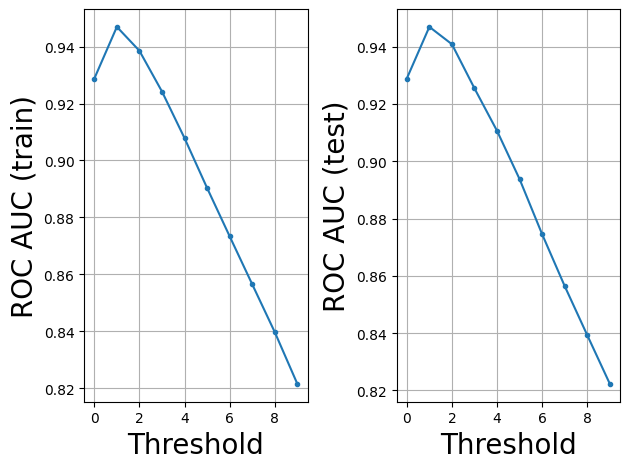

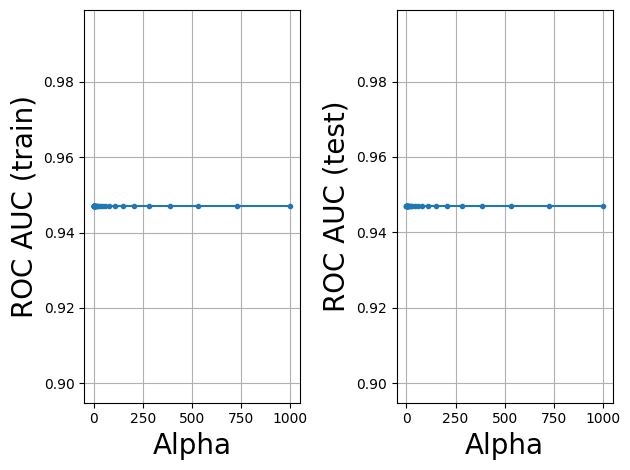

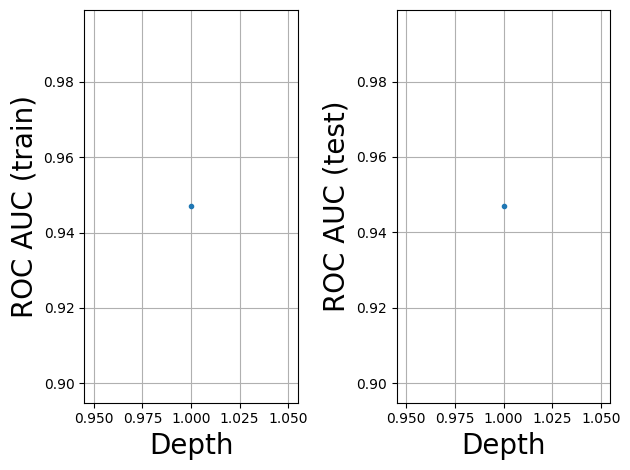

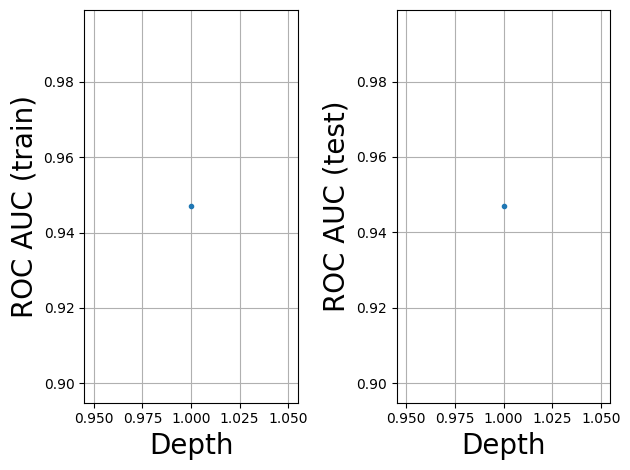

In [24]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import ravel


test_depth =  np.array(range(0, 10))
models = []
for i in tqdm(test_depth):
    models.append(MagicModel(k=i).fit(train_features, ravel(train_target)))
plot_roc_auc(test_depth, models, "Threshold")

test_depth =  np.geomspace(0.1, 1000., 30)
models = []
for i in tqdm(test_depth):
    models.append(MagicEnsemble(MagicModel(k=1), RidgeClassifier(alpha=i).fit(features_cut, ravel(target_cut))))
plot_roc_auc(test_depth, models, "Alpha")

test_depth = np.array(range(1, 2))
models = []
for i in tqdm(test_depth):
    models.append(MagicEnsemble(MagicModel(k=1), DecisionTreeClassifier().fit(features_cut, ravel(target_cut))))
plot_roc_auc(test_depth, models, "Depth")

test_depth = np.array(range(1, 2))
models = []
for i in tqdm(test_depth):
    models.append(MagicEnsemble(MagicModel(k=1), RandomForestClassifier().fit(features_cut, ravel(target_cut))))
plot_roc_auc(test_depth, models, "Depth")

100%|██████████| 50/50 [00:00<?, ?it/s]


[0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469073537865567, 0.9469073537865567, 0.9469076693773741, 0.9469073537865567, 0.9469073537865567, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469076693773741, 0.9469070381957391, 0.9469076693773741, 0.9469073537865567, 0.9469073537865567, 0.9469073537865567, 0.946906407014104, 0.9469070381957391, 0.9469073537865567, 0.9469073537865567, 0.9469067226049215, 0.946906407014104, 0.9469067226049215, 0.9469073537865567, 0.9469070381957391, 0.9469070381957391, 0.9469073537865567, 0.9469060914232863, 0.9469070381957391, 0.9469048290600162, 0.9469057758324687, 0.9469060914232863, 0.9469045134691985, 0.9469057758324687, 0.9469060914232863, 0.946902619924293, 0.9469029355151107, 0.9469007263793877, 0.9469048290600162, 0.946901988742658, 0.9469035666967458, 0.9469016731518404, 0.9469013575610229, 0.9469007263793877, 0.9468988328344823, 0.9468972548803943, 0.946897570471212, 0.9468963081079416]


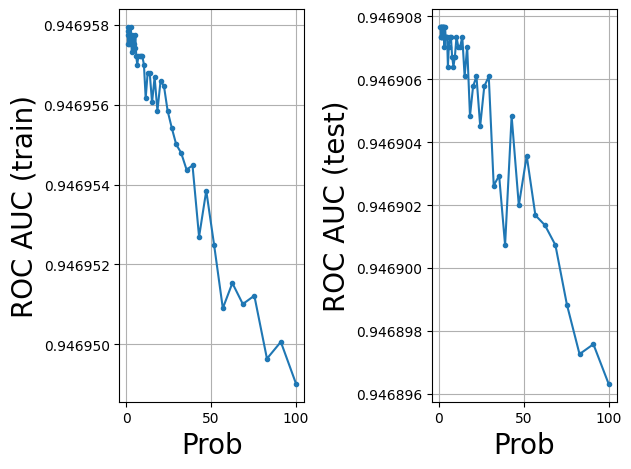

In [87]:
test_depth = np.geomspace(1, 100, 50)
models = []
for i in tqdm(test_depth):
    models.append(MagicModel(k=1, prob=i).fit(train_features, ravel(train_target)))
plot_roc_auc(test_depth, models, "Prob")

In [109]:
model = MagicEnsemble(MagicModel(k=1), RandomForestClassifier().fit(features_cut, ravel(target_cut)))

In [57]:
print(classification_report(test_target, model.predict(test_features)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1584330
           1       0.06      0.94      0.11      4859

    accuracy                           0.95   1589189
   macro avg       0.53      0.95      0.54   1589189
weighted avg       1.00      0.95      0.97   1589189


## Сборка ответа

In [58]:
links_test

,user1,user2
ID,,
0,426512423,767230291
1,127744839,589283004
2,76324543,189101836
3,79828756,272293999
4,88063046,280460807
...,...,...
706402,266088,172683390
706403,158366680,181474112
706404,50956059,82110465


In [59]:
test_profiles = pd.merge(links_test, profiles_1, "left", left_on="user1", right_index=True)
test_profiles = pd.merge(test_profiles, profiles_2, "left", left_on="user2", right_index=True)
test_profiles

,user1,user2,user1_is_closed,user1_city,user1_sex,user1_followers_count,user1_schools,user1_schools_years_grad,user1_universities,user1_universities_years_grad,...,user2_is_closed,user2_city,user2_sex,user2_followers_count,user2_schools,user2_schools_years_grad,user2_universities,user2_universities_years_grad,user2_faculties,user2_careers
ID,,,,,,,,,,,,,,,,,,,,,
0,426512423,767230291,False,2.0,1,298.0,NaN,NaN,NaN,NaN,...,False,NaN,2,294.0,[],[],[53],[2022],[None],[]
1,127744839,589283004,False,2.0,1,410.0,['45887'],[None],"[53, 671]","[None, None]",...,False,NaN,1,302.0,['293959'],[None],[53],[2025],[2268355],[]
2,76324543,189101836,False,2.0,2,299.0,NaN,NaN,NaN,NaN,...,False,NaN,1,146.0,NaN,NaN,NaN,NaN,NaN,NaN
3,79828756,272293999,False,2.0,2,597.0,NaN,NaN,NaN,NaN,...,False,2.0,2,213.0,NaN,NaN,NaN,NaN,NaN,NaN
4,88063046,280460807,False,NaN,2,349.0,[],[],[],[],...,False,2.0,2,296.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706402,266088,172683390,False,1.0,2,1627.0,NaN,NaN,NaN,NaN,...,False,158.0,1,311.0,['646'],[None],[53],[None],[2268355],[37784625]
706403,158366680,181474112,False,2.0,1,220.0,NaN,NaN,NaN,NaN,...,False,2.0,2,298.0,['113495'],[None],"[729, 53]","[2021, None]","[3181, 2185900]",[]
706404,50956059,82110465,False,2.0,2,492.0,NaN,NaN,NaN,NaN,...,False,2.0,2,250.0,[],[],[],[],[],[161665691]


In [60]:
test_dataset = test_profiles
test_dataset.dtypes

user1                              int64
user2                              int64
user1_is_closed                     bool
user1_city                       float64
user1_sex                          int64
user1_followers_count            float64
user1_schools                     object
user1_schools_years_grad          object
user1_universities                object
user1_universities_years_grad     object
user1_faculties                   object
user1_careers                     object
user2_is_closed                     bool
user2_city                       float64
user2_sex                          int64
user2_followers_count            float64
user2_schools                     object
user2_schools_years_grad          object
user2_universities                object
user2_universities_years_grad     object
user2_faculties                   object
user2_careers                     object
dtype: object

In [61]:
# test_dataset['same_city'] = test_dataset.user1_city == test_dataset.user2_city
# test_dataset['same_sex'] = test_dataset.user1_sex == test_dataset.user2_sex
# test_dataset['same_school'] = test_dataset.apply(check_str_array_intersection("user1_schools", "user2_schools"), axis=1)
# test_dataset['same_university'] = test_dataset.apply(check_str_array_intersection("user1_universities", "user2_universities"), axis=1)
# test_dataset['same_faculty'] = test_dataset.apply(check_str_array_intersection("user1_faculties", "user2_faculties"), axis=1)
# test_dataset['same_career'] = test_dataset.apply(check_str_array_intersection("user1_careers", "user2_careers"), axis=1)
# test_dataset['same_university_and_faculty'] = test_dataset.same_university & test_dataset.same_faculty
# test_dataset['common_friends_count'] = test_dataset.apply(count_common_friends, axis=1)
test_dataset = pd.read_csv('checkpoints/test_dataset.csv')

In [62]:
test_dataset.to_csv('checkpoints/test_dataset.csv')

In [63]:
test_dataset_cut = test_dataset[["common_friends_count", 'same_career', 'same_city', 'same_university_and_faculty', 'same_faculty']]

test_dataset_cut

,common_friends_count,same_career,same_city,same_university_and_faculty,same_faculty
0,0,False,False,False,False
1,0,False,False,False,False
2,0,False,False,False,False
3,0,False,True,False,False
4,9,False,False,False,False
...,...,...,...,...,...
706402,0,False,False,False,False
706403,0,False,True,False,False
706404,0,False,True,False,False
706405,0,False,False,False,False


In [110]:
predictions = model.predict(test_dataset_cut)
predictions

0         False
1         False
2         False
3         False
4          True
          ...  
706402    False
706403    False
706404    False
706405    False
706406    False
Name: common_friends_count, Length: 706407, dtype: bool

In [111]:
output = predictions.to_frame().rename(columns={"common_friends_count": "is_friends"})
output.loc[output.is_friends == True]

,is_friends
4,True
15,True
22,True
61,True
68,True
...,...
706352,True
706353,True
706354,True
706355,True


In [112]:
output.to_csv("checkpoints/output.csv")